## Balancing Risk and reward

In [1]:
import pandas as pd
ind = pd.read_csv("https://github.com/stosia/quant.id/blob/master/Notebooks/100%20-%20Portfolio%20Construction%20and%20Analysis/ind30_m_vw_rets.csv?raw=true", index_col=0, header=0)/100

In [2]:
ind.index = pd.to_datetime(ind.index, format = "%Y%m").to_period('M')

In [3]:
ind

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,...,0.0083,0.0922,0.0206,0.0770,0.0193,-0.2379,0.0007,0.0187,0.0037,0.0520
1926-08,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0814,...,0.0217,0.0202,0.0439,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.0446,0.0676
1926-09,0.0116,0.0402,0.0126,0.0658,-0.0099,0.0073,-0.0051,0.0069,0.0533,0.0231,...,0.0241,0.0225,0.0019,-0.0554,0.0005,-0.0787,0.0025,-0.0056,-0.0123,-0.0386
1926-10,-0.0306,-0.0331,0.0106,-0.0476,0.0947,-0.0468,0.0012,-0.0057,-0.0476,0.0100,...,-0.0011,-0.0200,-0.0109,-0.0508,-0.0264,-0.1538,-0.0220,-0.0411,-0.0516,-0.0849
1926-11,0.0635,0.0729,0.0455,0.0166,-0.0580,-0.0054,0.0187,0.0542,0.0520,0.0311,...,0.0163,0.0377,0.0364,0.0384,0.0160,0.0467,0.0652,0.0433,0.0224,0.0400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08,-0.0038,-0.0186,-0.0543,0.0289,-0.0447,0.0254,0.0526,0.0446,0.0001,0.0380,...,0.0295,0.0524,0.0993,-0.0034,0.0291,0.0366,0.0911,0.0364,0.0245,0.0299
2018-09,-0.0032,0.0019,0.0537,-0.0009,-0.0221,0.0107,0.0130,0.0199,-0.0287,-0.0638,...,0.0174,-0.0037,-0.0033,-0.0030,0.0105,-0.0148,0.0061,0.0251,-0.0193,0.0116
2018-10,0.0102,-0.0157,0.0790,-0.1596,-0.0666,-0.0051,-0.1014,-0.0884,-0.1250,-0.2579,...,-0.0050,-0.0920,-0.0806,-0.0982,-0.0975,-0.0788,-0.1021,-0.0171,-0.0545,-0.0599
2018-11,0.0272,0.0579,-0.0843,-0.0065,0.0325,0.0644,-0.0099,0.0632,0.0496,0.0292,...,0.0254,0.0129,-0.0505,0.0822,0.0617,0.0318,0.0159,0.0616,0.0289,0.0348


Getting Features

In [4]:
ind.columns

Index(['Food ', 'Beer ', 'Smoke', 'Games', 'Books', 'Hshld', 'Clths', 'Hlth ',
       'Chems', 'Txtls', 'Cnstr', 'Steel', 'FabPr', 'ElcEq', 'Autos', 'Carry',
       'Mines', 'Coal ', 'Oil  ', 'Util ', 'Telcm', 'Servs', 'BusEq', 'Paper',
       'Trans', 'Whlsl', 'Rtail', 'Meals', 'Fin  ', 'Other'],
      dtype='object')

In [6]:
#stripping whitespace from column names
ind.columns = ind.columns.str.strip()

In [5]:
def drawdown(return_series: pd.Series):
    #Takes in time series of asset returns, outputs a DataFrame with wealth index, previous peaks, and percentage drawdown.
    wealth_index = 1000*(1+return_series).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdowns = (wealth_index - previous_peaks)/previous_peaks
    return pd.DataFrame({"Wealth": wealth_index,
                         "Previous Peak": previous_peaks,
                         "Drawdown": drawdowns})

In [7]:
ind.index.min()

Period('1926-07', 'M')

In [8]:
ind.index.max()

Period('2018-12', 'M')

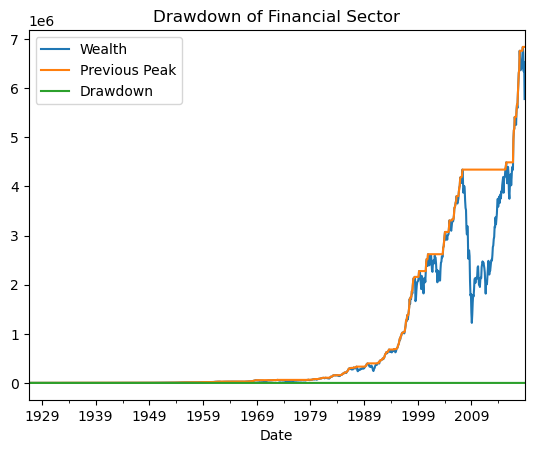

In [9]:
import matplotlib.pyplot as plt
drawdown(ind['Fin']).plot.line()
plt.title("Drawdown of Financial Sector")
plt.xlabel("Date") 
plt.show()

Text(0.5, 0, 'Date')

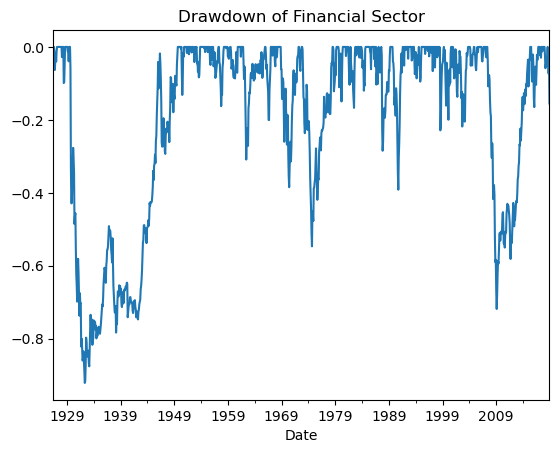

In [11]:
drawdown(ind['Fin'])['Drawdown'].plot.line()
plt.title("Drawdown of Financial Sector")
plt.xlabel("Date")

### Defining functions

In [ ]:
def annualize_rets(r, periods_per_year):
    """
    Annualizes a set of returns
    We should infer the periods per year
    but that is currently left as an exercise
    to the reader :-)
    """
    compounded_growth = (1+r).prod()
    n_periods = r.shape[0]
    return compounded_growth**(periods_per_year/n_periods)-1

def annualize_vol(r, periods_per_year):
    """
    Annualizes the vol of a set of returns
    We should infer the periods per year
    but that is currently left as an exercise
    to the reader :-)
    """
    return r.std()*(periods_per_year**0.5)

def sharpe_ratio(r, riskfree_rate, periods_per_year):
    """
    Computes the annualized sharpe ratio of a set of returns
    """
    # convert the annual riskfree rate to per period (going from yearly to monthly rate)
    rf_per_period = (1+riskfree_rate)**(1/periods_per_year)-1
    #get excess return (numerator)
    excess_ret = r - rf_per_period
    ann_ex_ret = annualize_rets(excess_ret, periods_per_year)
    ann_vol = annualize_vol(r, periods_per_year)
    return ann_ex_ret/ann_vol

In [13]:
sharpe_ratio(ind, .03, 12).sort_values(ascending = False)

Food     0.454770
Smoke    0.446361
Hlth     0.437783
Telcm    0.383294
Paper    0.364722
Rtail    0.364325
Beer     0.351780
Chems    0.344903
BusEq    0.342974
Meals    0.332717
Oil      0.330358
Hshld    0.307349
Util     0.306945
Clths    0.293105
ElcEq    0.293063
Carry    0.285916
Fin      0.282243
Servs    0.267263
FabPr    0.265297
Cnstr    0.229351
Autos    0.227548
Trans    0.214624
Txtls    0.194906
Games    0.194420
Books    0.192686
Mines    0.177109
Other    0.160862
Whlsl    0.143494
Steel    0.126052
Coal     0.084275
dtype: float64

Food has highest sharpe ratio, suggesting that the investment generates more return for each unit of risk.

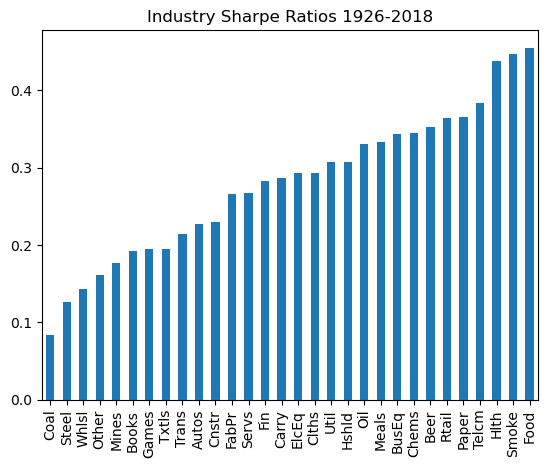

In [14]:
sharpe_ratio(ind, 0.03, 12).sort_values().plot.bar(title="Industry Sharpe Ratios 1926-2018")
plt.show()

## Expected returns and covariance matrix

In [15]:
er = annualize_rets(ind, 12)
er.head()

Food     0.106649
Beer     0.120041
Smoke    0.122324
Games    0.091829
Books    0.079147
dtype: float64

<Axes: >

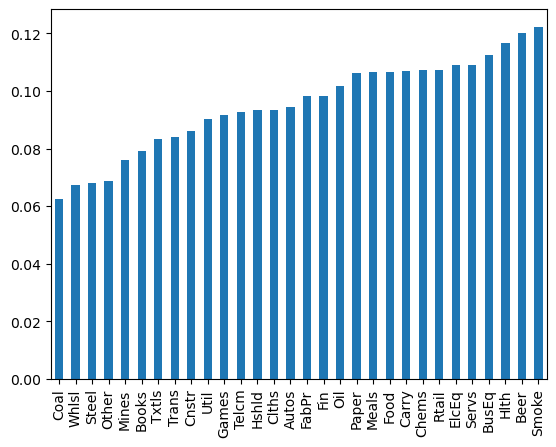

In [16]:
er.sort_values().plot.bar()

So, smoke and beer had the highest annaul expected return, despite being riskier than food.

Covariance matrix

In [17]:
cov = ind.cov()
cov.iloc[0:5, 0:5]

,Food,Beer,Smoke,Games,Books
Food,0.002241,0.002383,0.001831,0.002971,0.002473
Beer,0.002383,0.005164,0.001902,0.004127,0.003071
Smoke,0.001831,0.001902,0.003374,0.002519,0.001994
Games,0.002971,0.004127,0.002519,0.007951,0.004682
Books,0.002473,0.003071,0.001994,0.004682,0.005119


In [18]:
import numpy as np
n_points = 101
weights = [np.array([w, 1-w]) for w in np.linspace(0, 1, n_points)]

In [19]:
weights[0:6]

[array([0., 1.]),
 array([0.01, 0.99]),
 array([0.02, 0.98]),
 array([0.03, 0.97]),
 array([0.04, 0.96]),
 array([0.05, 0.95])]

@ is the matrix multiplication operator

In [20]:
def portfolio_return(weights, returns):
  return weights.T @ returns

def portfolio_vol(weights, covmat):
  return (weights.T @ covmat @ weights)**0.5

Plotting the efficient frontier

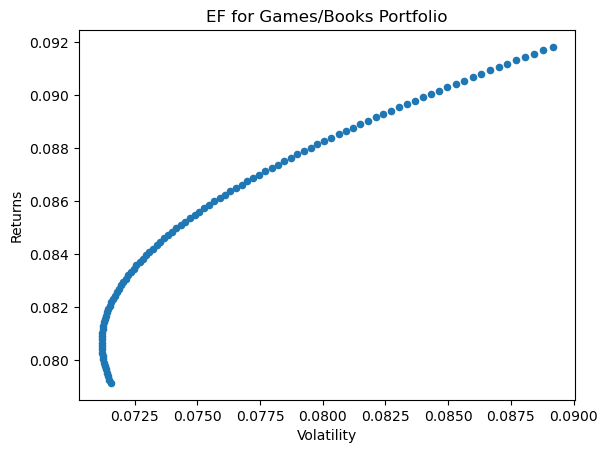

In [23]:
l = ["Games", "Books"]
rets = [portfolio_return(w, er[l]) for w in weights]
vols = [portfolio_vol(w, cov.loc[l,l]) for w in weights]
ef = pd.DataFrame({"Returns": rets, "Volatility": vols})
ef.plot.scatter(x="Volatility", y="Returns")
plt.title("EF for Games/Books Portfolio")
plt.show()

# Exercises

It looks like smoke and beer were some of the best investments during this time period.

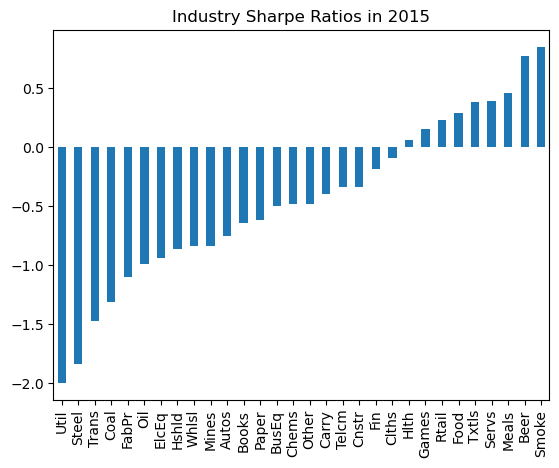

In [32]:
#get 2015 industries
ind_2015 = ind.loc["2015"]
sharpe_ratio(ind_2015, .05, 12).sort_values().plot.bar(title="Industry Sharpe Ratios in 2015")
plt.show()

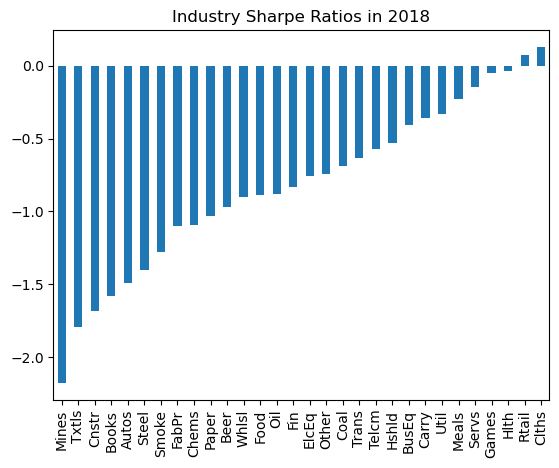

In [33]:
ind_2018 = ind.loc["2018"]
sharpe_ratio(ind_2018, .05, 12).sort_values().plot.bar(title="Industry Sharpe Ratios in 2018")
plt.show()

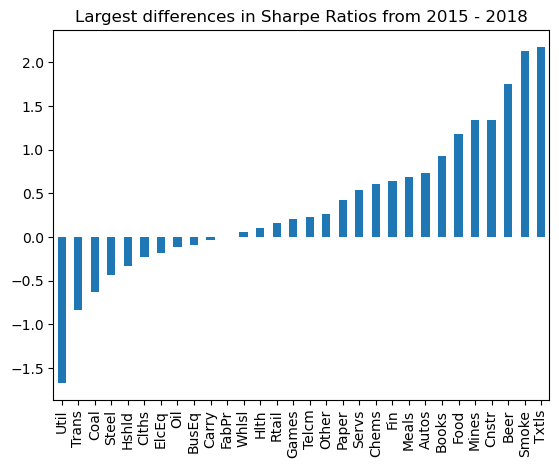

In [36]:
(sharpe_ratio(ind_2015, .05, 12).sort_values() - sharpe_ratio(ind_2018, .05, 12).sort_values()).sort_values().plot.bar(title="Largest differences in Sharpe Ratios from 2015 - 2018")
plt.show()

Beer, smoke, and textiles (it looks like) had the biggest difference during this 3 year period.

In [ ]:
#annualized returns for Beer and Mines in 1995-2005
ind_95_05 = ind.iloc[822:954]
beer_ann = annualize_rets(ind_95_05['Beer'], 12)
mines_ann = annualize_rets(ind_95_05['Mines'], 12)

np.float64(0.0887615075831567)

Plotting efficient frontier for Oil and Chems

In [ ]:
select = ["Oil", "Chems"]
n_point = 101
weights = [np.array([w, 1-w]) for w in np.linspace(0, 1, n_points)]


ef = er